In [22]:
print("Hello")

Hello


In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [39]:
dir_name = "dataset/faces"
y = [];
X = [];
target_names = [];
person_id = 0;
h = w = 300;
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    print(person_name)
    dir_path = dir_name + "/" + person_name + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples = n_samples + 1
        y.append(person_id)
        target_names.append(person_name)
    person_id = person_id + 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of  samples:", n_samples)

n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Aamir
Ajay
Akshay
Alia
Amitabh
Deepika
Disha
Farhan
Ileana
(450,) (450, 90000) (450,)
Number of  samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


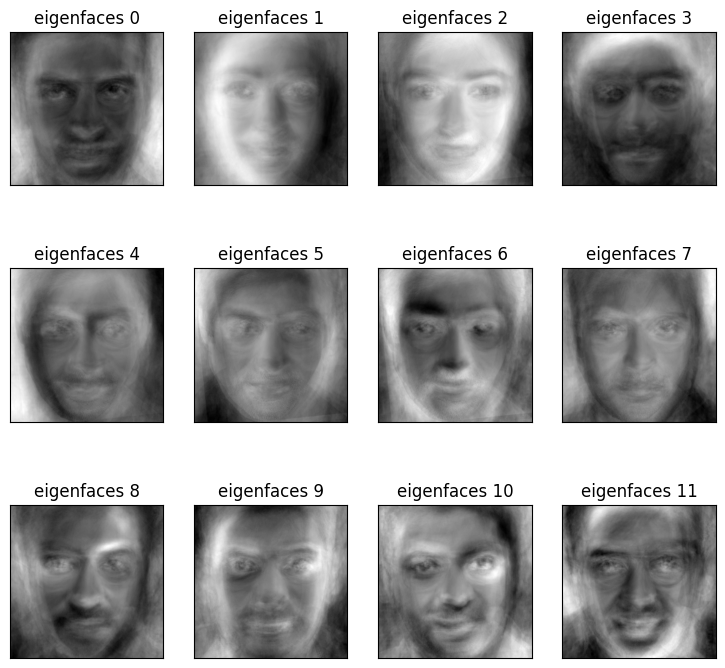

projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project Done


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenfaces %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project Done")

In [46]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.41748502
Iteration 2, loss = 3.35291293
Iteration 3, loss = 3.29393228
Iteration 4, loss = 3.23328238
Iteration 5, loss = 3.17286796
Iteration 6, loss = 3.11664437
Iteration 7, loss = 3.05843473
Iteration 8, loss = 3.00269737
Iteration 9, loss = 2.94936976
Iteration 10, loss = 2.89667741
Iteration 11, loss = 2.84479160
Iteration 12, loss = 2.79591778
Iteration 13, loss = 2.74677258
Iteration 14, loss = 2.70051264
Iteration 15, loss = 2.65304110
Iteration 16, loss = 2.60867398
Iteration 17, loss = 2.56616811
Iteration 18, loss = 2.52267495
Iteration 19, loss = 2.48477866
Iteration 20, loss = 2.44370198
Iteration 21, loss = 2.40711225
Iteration 22, loss = 2.36839681
Iteration 23, loss = 2.33190867
Iteration 24, loss = 2.29676355
Iteration 25, loss = 2.26171517
Iteration 26, loss = 2.22817693
Iteration 27, loss = 2.19398239
Iteration 28, loss = 2.16141805
Iteration 29, loss = 2.12946848
Iteration 30, loss = 2.09829659
Iteration 31, loss = 2.06837702
Iteration 32, los

Accuracy: 76.99115044247787


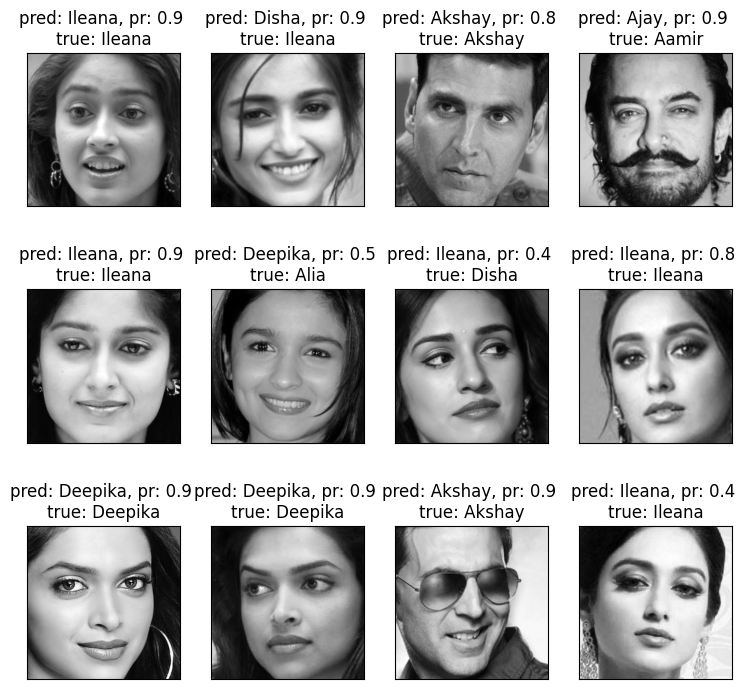

In [47]:
y_pred = [];
y_prob = []
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive = true_positive + 1

print("Accuracy:", true_positive * 100 / y_pred.shape[0])
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
